In [240]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt

agent = 'relu-1'

with open(f'./agents/{agent}/epochs.json') as file:
  epochs = json.load(file)
with open(f'./agents/{agent}/evaluations.json') as file:
  evaluations = json.load(file)

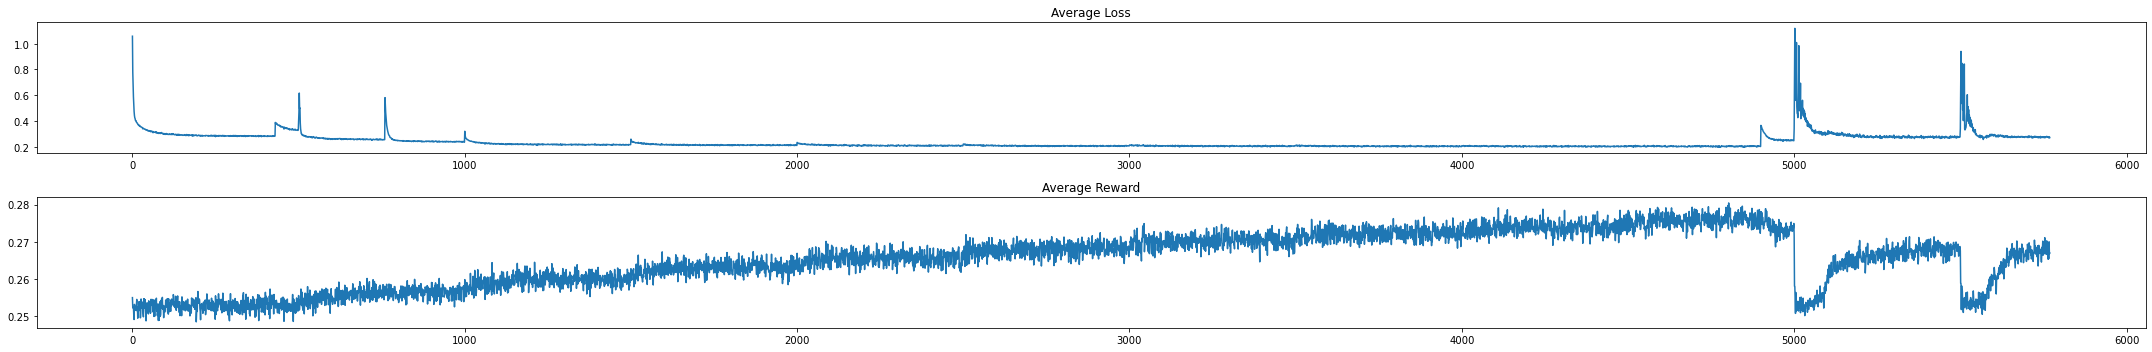

In [241]:
x = [i['epoch'] for i in epochs][:]
y_loss = [i['loss']**0.5 for i in epochs if i['epoch'] in x]
y_rewards = [i['reward'] for i in epochs if i['epoch'] in x]

figure, axis = plt.subplots(2,1)
figure.set_figheight(5)
figure.set_figwidth(30)

axis[0].set_title("Average Loss")
axis[0].plot(x,y_loss)

axis[1].set_title("Average Reward")
axis[1].plot(x,y_rewards)

figure.tight_layout()


<BarContainer object of 45 artists>

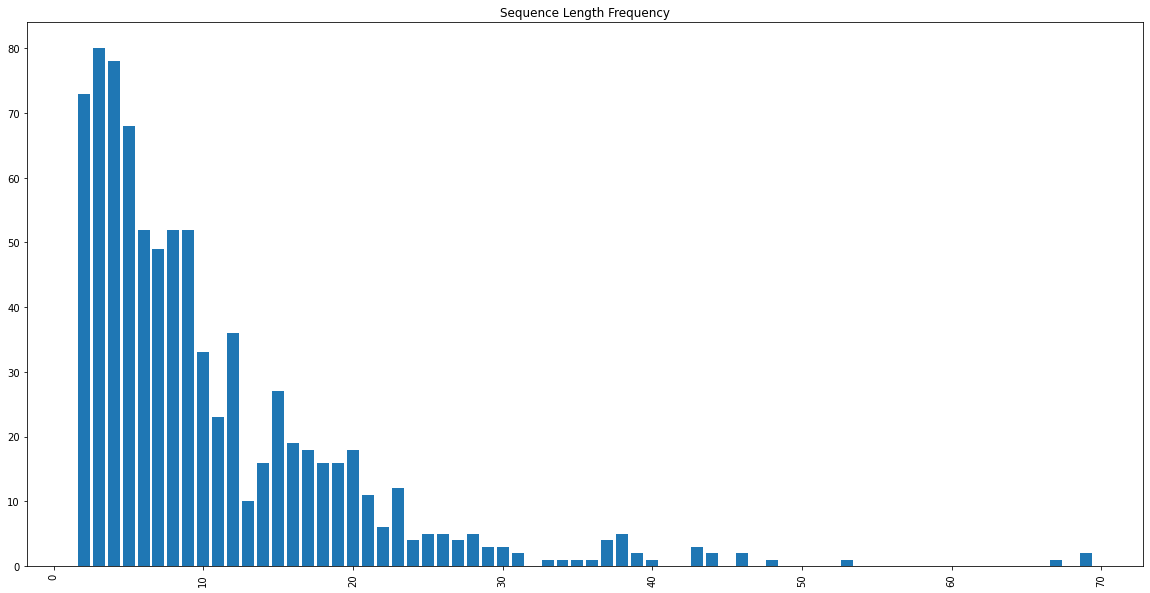

In [242]:
lengths = {}
for item in evaluations:
  if item['count'] in lengths:
    lengths[item['count']] += 1
  else:
    lengths[item['count']] = 1


plt.figure(figsize=(20,10))
plt.title("Sequence Length Frequency")
plt.xticks(rotation=90)
plt.bar(lengths.keys(), lengths.values())


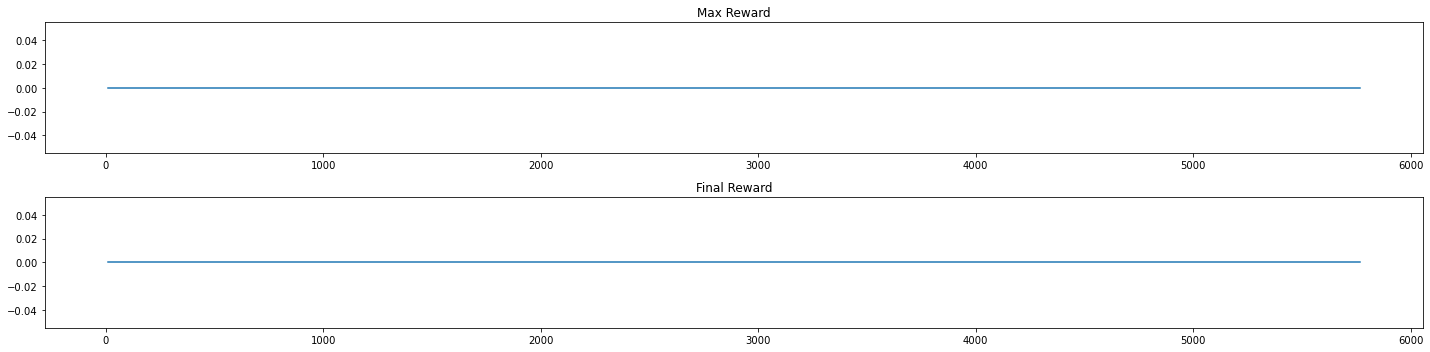

In [243]:
epochs = [x['epoch'] for x in evaluations]
max_rewards = [x['reward_max'] for x in evaluations if x['epoch'] in epochs]
final_rewards = [x['reward_final'] for x in evaluations if x['epoch'] in epochs]

figure, axis = plt.subplots(2,1)
figure.set_figheight(5)
figure.set_figwidth(20)

axis[0].set_title("Max Reward")
axis[0].plot(epochs,max_rewards)

axis[1].set_title("Final Reward")
axis[1].plot(epochs,final_rewards)

figure.tight_layout()